In [1]:
import sys
sys.path.append('../src/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from blackjack_utils import simulation

Discrete Standing Strategy

In [28]:
avg_net_gains = []

for stand_value in range(12, 20):
    def fixed_stand_strategy(hands, deck, **kwargs):
        while hands[0].value() < stand_value:
            deck.deal(hands[0])
        
        return False
    
    all_net_gains = []
    
    for trials in range(500000):
        all_net_gains.append(simulation(fixed_stand_strategy))

    avg_net_gains.append(np.mean(all_net_gains))

print(avg_net_gains)

[np.float64(-10.5382), np.float64(-9.2186), np.float64(-8.3044), np.float64(-7.9418), np.float64(-7.973), np.float64(-8.5074), np.float64(-11.724), np.float64(-20.5552)]


Text(0.5, 1.0, 'Average Loss Per 100 Dollar Bet with Different Discrete Standing Values')

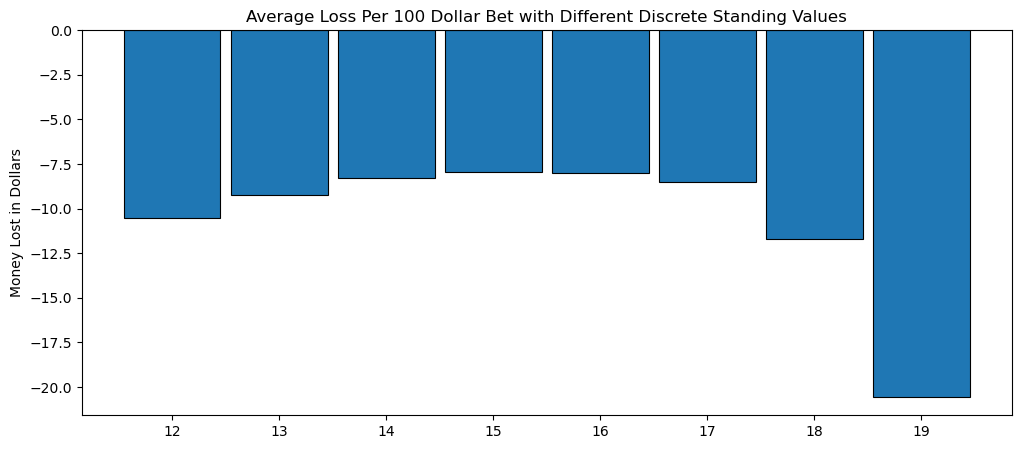

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(np.arange(12, 20), avg_net_gains, width=0.9, edgecolor="black", linewidth=0.8)
ax.set_ylabel('Money Lost in Dollars')
ax.set_title('Average Loss Per 100 Dollar Bet with Different Discrete Standing Values')

Stochastic Standing Strategy